In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Set style
sns.set_theme(style="whitegrid", context="talk", palette="pastel")

In [19]:
# -----------------------------
# Load all datasets
# -----------------------------
players = pd.read_csv('data/players.csv')
sessions = pd.read_csv('data/sessions.csv')
campaigns = pd.read_csv('data/campaigns.csv')
participation = pd.read_csv('data/campaign_participation.csv')
support = pd.read_csv('data/support_tickets.csv')

print("✅ Data Loaded Successfully")
print(f"Players: {players.shape}, Sessions: {sessions.shape}, Campaigns: {campaigns.shape}")

✅ Data Loaded Successfully
Players: (50000, 5), Sessions: (1372932, 4), Campaigns: (20, 6)


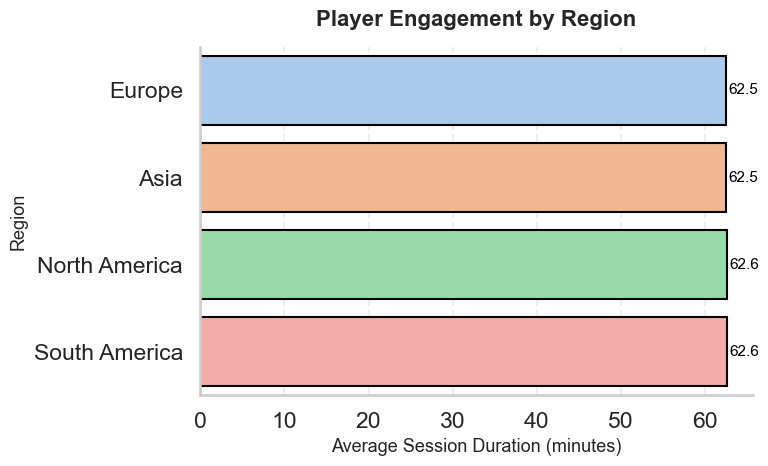

In [47]:
# -----------------------------
# Player Engagement by Region 
# -----------------------------
plt.figure(figsize=(8,5))

# Prepare data
region_summary = player_stats.groupby('region')['avg_session_duration'].mean().reset_index()
region_summary = region_summary.sort_values('avg_session_duration', ascending=True)

# Use a light pastel color palette
colors = sns.color_palette("pastel", n_colors=len(region_summary))

# Create horizontal bar plot
sns.barplot(
    data=region_summary,
    y='region',
    x='avg_session_duration',
    palette=colors,
    edgecolor='black'
)

# Title and labels
plt.title("Player Engagement by Region", fontsize=16, weight='bold', pad=15)
plt.xlabel("Average Session Duration (minutes)", fontsize=13)
plt.ylabel("Region", fontsize=13)

# Add value labels neatly beside each bar
for i, val in enumerate(region_summary['avg_session_duration']):
    plt.text(val + 0.3, i, f"{val:.1f}", va='center', fontsize=11, color='black')

# Light gridlines for readability
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Clean up the chart
sns.despine()
plt.tight_layout()
plt.show()

In [21]:
# Merge with player info
player_stats = players.merge(engagement, on='player_id', how='left')

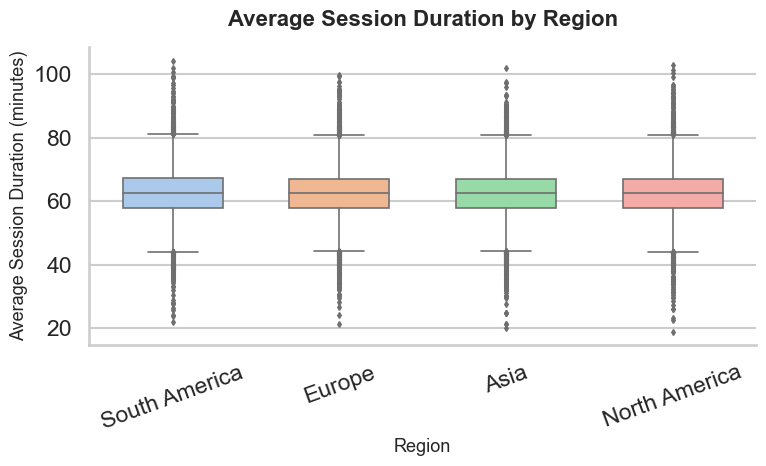

In [44]:
# -----------------------------
# Average Session Duration by Region (Boxplot)
# -----------------------------
plt.figure(figsize=(8,5))

# Use a soft pastel palette
colors = sns.color_palette("pastel")

# Create boxplot to show distribution per region
sns.boxplot(
    data=player_stats,
    x='region',
    y='avg_session_duration',
    palette=colors,
    width=0.6,
    fliersize=3,
    linewidth=1.2
)

# Add title and labels
plt.title("Average Session Duration by Region", fontsize=16, weight='bold', pad=15)
plt.xlabel("Region", fontsize=13)
plt.ylabel("Average Session Duration (minutes)", fontsize=13)
plt.xticks(rotation=20)

# Clean layout
sns.despine()
plt.tight_layout()
plt.show()

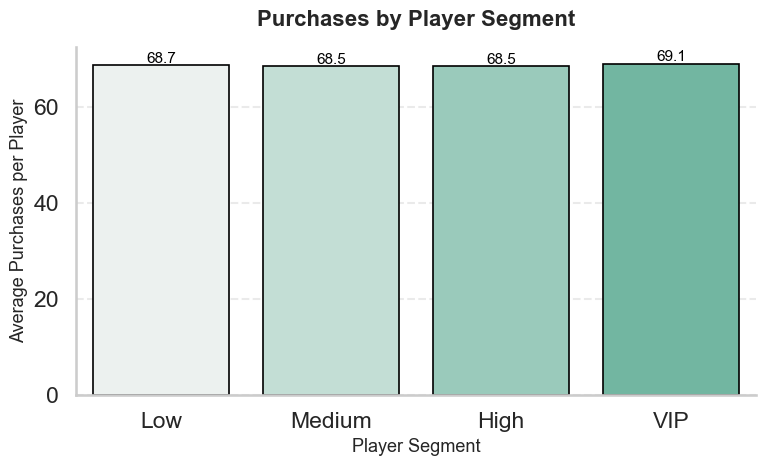

In [46]:
# -----------------------------
# 2. Purchases by Player Segment
# -----------------------------
plt.figure(figsize=(8,5))

# Prepare data
purchase_summary = (
    player_stats.groupby('spend_level')['total_purchases']
    .mean()
    .reindex(['Low','Medium','High','VIP'])
    .reset_index()
)

# Use a soft gradient pastel palette
colors = sns.color_palette("light:#66c2a5", n_colors=len(purchase_summary))

# Create barplot with rounded edges
bars = sns.barplot(
    data=purchase_summary,
    x='spend_level',
    y='total_purchases',
    palette=colors,
    edgecolor='black',
    linewidth=1.2
)

# Add title and labels
plt.title("Purchases by Player Segment", fontsize=16, weight='bold', pad=15)
plt.xlabel("Player Segment", fontsize=13)
plt.ylabel("Average Purchases per Player", fontsize=13)

# Add value labels above bars
for i, val in enumerate(purchase_summary['total_purchases']):
    plt.text(i, val + 0.5, f"{val:.1f}", ha='center', fontsize=11, color='black')

# Add a soft background grid
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove top and right borders
sns.despine()

# Adjust layout
plt.tight_layout()
plt.show()

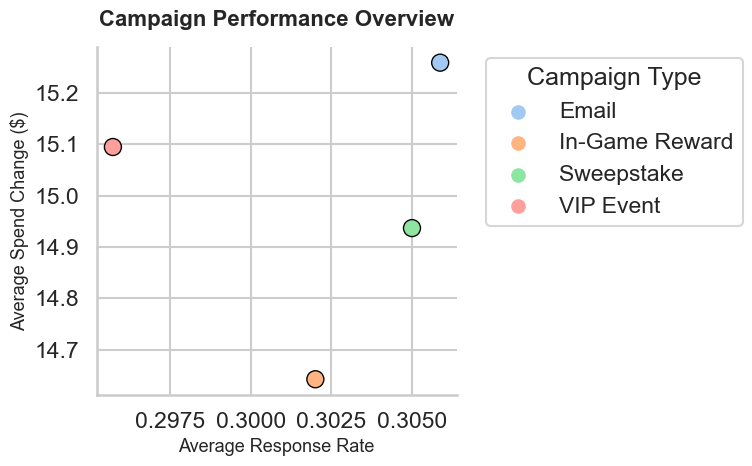

In [40]:
# -----------------------------
# 3. Campaign Performance Overview
# -----------------------------
plt.figure(figsize=(8,5))
campaign_summary_sorted = campaign_summary.groupby('type')[['response','spend_change']].mean().reset_index()

colors = sns.color_palette("pastel", n_colors=len(campaign_summary_sorted))
sns.scatterplot(data=campaign_summary_sorted, x='response', y='spend_change',
                hue='type', s=150, palette=colors, edgecolor='black')

plt.title("Campaign Performance Overview", fontsize=16, weight='bold', pad=15)
plt.xlabel("Average Response Rate", fontsize=13)
plt.ylabel("Average Spend Change ($)", fontsize=13)
plt.legend(title="Campaign Type", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

sns.despine()
plt.tight_layout()
plt.show()

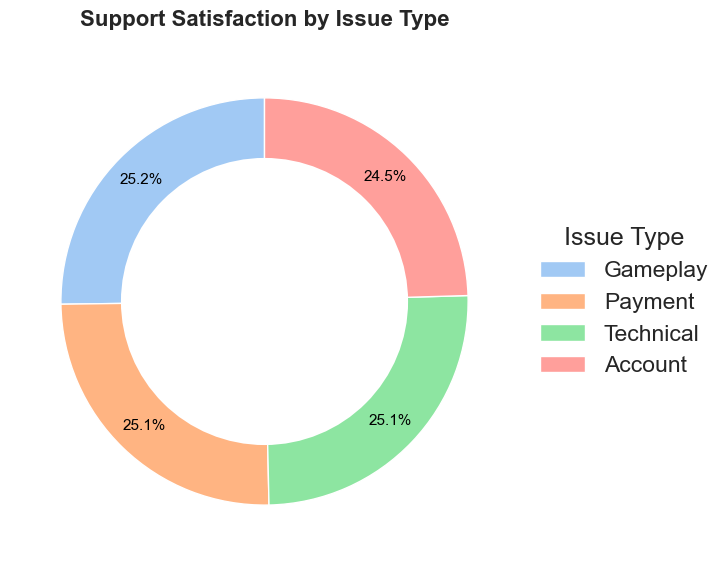

In [43]:
# -----------------------------
# 4. Support Satisfaction by Issue Type
# -----------------------------
plt.figure(figsize=(8,6))

# Prepare data
avg_satisfaction_sorted = avg_satisfaction.sort_values('satisfaction_score', ascending=False)

# Use soft pastel colors
colors = sns.color_palette("pastel", n_colors=len(avg_satisfaction_sorted))

# Create pie chart with spacing and percentage labels outside
wedges, texts, autotexts = plt.pie(
    avg_satisfaction_sorted['satisfaction_score'],
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

# Draw a white circle in the middle to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title
plt.title("Support Satisfaction by Issue Type", fontsize=16, weight='bold', pad=15)

# Add legend outside the chart
plt.legend(
    avg_satisfaction_sorted['issue_type'],
    title="Issue Type",
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False
)

# Adjust text style
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)

plt.tight_layout()
plt.show()

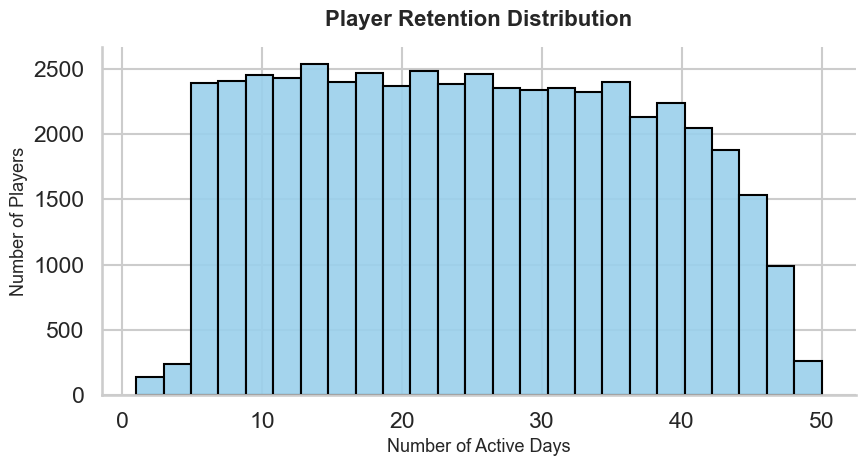

In [41]:
# -----------------------------
# 5. Player Retention Distribution
# -----------------------------
plt.figure(figsize=(9,5))
sns.histplot(player_stats['active_days'], bins=25, color='#9AD0EC', alpha=0.9, edgecolor='black')
plt.title("Player Retention Distribution", fontsize=16, weight='bold', pad=15)
plt.xlabel("Number of Active Days", fontsize=13)
plt.ylabel("Number of Players", fontsize=13)

sns.despine()
plt.tight_layout()
plt.show()

In [11]:
# -----------------------------
# Summary Insights
# -----------------------------
print("📊 Key Insights:")
print(f"- Average active days per player: {player_stats['active_days'].mean():.2f}")
print(f"- VIPs show {vip_stats['total_purchases'].mean():.2f} avg purchases vs {non_vip_stats['total_purchases'].mean():.2f} for others.")
print(f"- Best performing campaign type: {campaign_summary.loc[campaign_summary['response'].idxmax(), 'type']}")
print(f"- Highest satisfaction issue type: {avg_satisfaction.loc[avg_satisfaction['satisfaction_score'].idxmax(), 'issue_type']}")

📊 Key Insights:
- Average active days per player: 25.04
- VIPs show 69.08 avg purchases vs 68.61 for others.
- Best performing campaign type: Email
- Highest satisfaction issue type: Gameplay
